In [10]:
#그래프 파일과 단어의 출현 횟수가 저장된 파일 불러오기 (해당 부분은 단어 각각의 출현 횟수임) 동시 출현하는 빈도는 G의 edge weight로 저장됨
import networkx as nx
import csv
platform="rob" #zep or rob
data="origin" #origin, hate, like, medium
path="/content/drive/MyDrive/성균관대/github/tf-idf/" #해당 그래프 및 단어 빈도가 저장된 파일이 있는 위치 경로
G = nx.read_graphml(path+platform+"_"+data+'_tf_idf_graph.graphml')
with open(path+platform+"_"+data+'_tf_idf.csv') as csv_file:
    reader = csv.reader(csv_file)
    tf_idf_dict = dict(reader)
G = nx.read_graphml(path+platform+"_"+data+'_tf_idf_graph.graphml')
with open(path+platform+"_"+data+'_word_count.csv') as csv_file:
    reader = csv.reader(csv_file)
    count_dict = dict(reader)

In [11]:
for key in tf_idf_dict:
  tf_idf_dict[key]=float(tf_idf_dict[key])

for key in count_dict:
  count_dict[key]=int(tf_idf_dict[key])

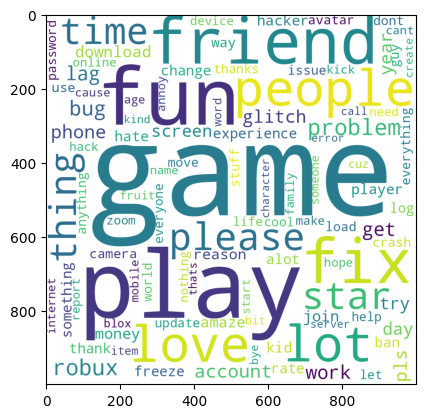

In [12]:
#wordcloud c_dict=단어들의 출현 빈도
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(count_dict)
plt.imshow(wc)

In [13]:
import itertools
small_network = G.copy()
not_remove=dict(itertools.islice(tf_idf_dict.items(), 200)) #제거하지 않을 집합
nodes_to_remove = set(G.nodes()) - set(not_remove)
small_network.remove_nodes_from(nodes_to_remove)
nx.write_graphml_lxml(small_network, "./small_"+platform+"_"+data+"_graph.graphml")

(-0.1090593959763646,
 0.06943881023675204,
 -0.15141664564609528,
 0.03482835114002228)

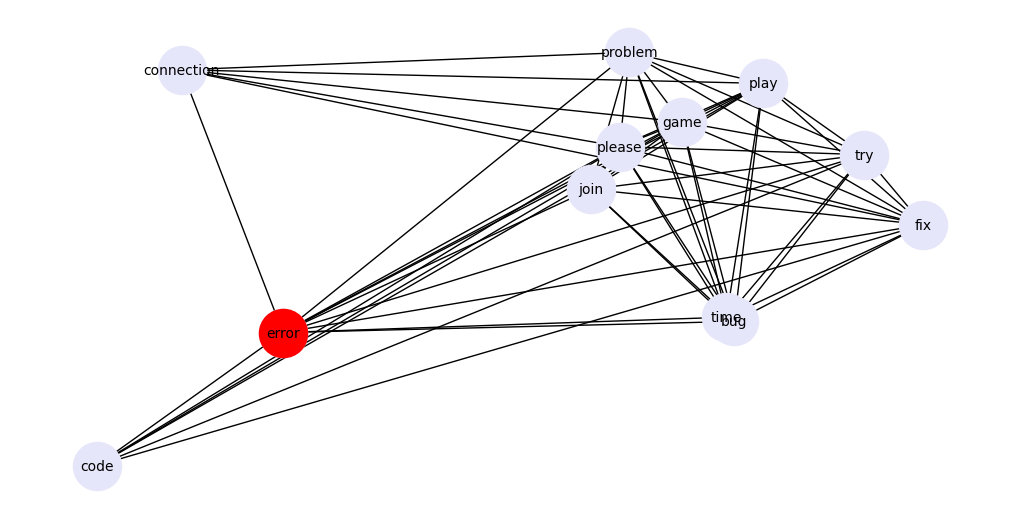

In [16]:
#ego network 그리기
import matplotlib.pyplot as plt
ego = 'error'

def drop_low_weighted_edge(inputG, above_weight=3): #above_weight는 threshold 값이 됨. weight가 above_weight 이상 넘는 것만 남김.
    rG = nx.Graph()
    rG.add_nodes_from(inputG.nodes(data=True))
    edges = filter(lambda e: True if e[2]['weight']>=above_weight else False, inputG.edges(data=True))
    rG.add_edges_from(edges)
    """
    neighbor가 없는 isolated node를 모두 지운다. 
    """
    for n in inputG.nodes():
        if len(list(nx.all_neighbors(rG, n)))==0:
            rG.remove_node(n)
        #print(n, list(nx.all_neighbors(rG, n)))
    return rG
    

G1 = drop_low_weighted_edge(G, 200)

G_ego = nx.ego_graph(G1, ego)
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G)
nx.draw(G_ego, pos, node_color = "lavender", 
        node_size = 1200, with_labels = True, font_size=10)
  
options = {"node_size": 1200, "node_color": "r"}
nx.draw_networkx_nodes(G_ego, pos, nodelist=[ego], **options)
plt.axis('off')